<a href="https://www.kaggle.com/code/everythingcanbedone/heart-disease-eda-model?scriptVersionId=217940573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Data Cleaning


In [7]:
# Count of Null Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Checking for duplicates.¶

In [8]:
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No Duplicate Row Exists")
else:
    print("Duplicate Rows Found")
(duplicate_rows) 

Duplicate Rows Found


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
duplicate_rows = df[df.duplicated(keep=False)]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No Duplicate Row Exists")
else:
    print("Duplicate Rows Found")
    
    # Find one duplicate row
    duplicate_row = duplicate_rows.iloc[0]
    
    # Find the index of the first occurrence of this duplicate row
    original_index = df[df.duplicated(keep='first')].index[0]
    
    # Print the duplicate row and its original index
    print(f"Duplicate Row:\n{duplicate_row}")
    print(f"Original row index of this duplicate: {original_index}")


Duplicate Rows Found
Duplicate Row:
age          52.0
sex           1.0
cp            0.0
trestbps    125.0
chol        212.0
fbs           0.0
restecg       1.0
thalach     168.0
exang         0.0
oldpeak       1.0
slope         2.0
ca            2.0
thal          3.0
target        0.0
Name: 0, dtype: float64
Original row index of this duplicate: 15


In [10]:
# Count the frequency of each unique row
row_counts = df.groupby(df.columns.tolist()).size().reset_index(name='Count')

# Merge the frequency (Count) back with the original dataset
data_with_counts = pd.merge(df, row_counts, on=df.columns.tolist(), how='left')

# Calculate weights based on the frequency (Count) — you can choose different ways to assign weights
# Option 1: Assign weight as the count itself
data_with_counts['Weight'] = data_with_counts['Count']

# Option 2: Normalize the weights so they sum to 1 (if needed)
data_with_counts['Weight'] = data_with_counts['Count'] / data_with_counts['Count'].sum()

data_with_counts.drop('Count', inplace=True, axis=1)
# Show the dataset with weights
(data_with_counts)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Weight
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.00112
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.00112
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.00112
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.00112
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.00084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.00084
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.00084
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0.00112
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,0.00084


In [11]:
(data_with_counts).shape
dropped_df = data_with_counts.drop_duplicates(inplace=False)
dropped_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Weight
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.00112
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.00112
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.00112
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.00112
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.00084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0.00084
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,0.00084
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,0.00084
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0.00084


### Duplicated Drop vs Normal vs Weight Correlation

In this analysis, we compared the correlation matrices of the dataset under three different conditions:

1. **Normal Data**: The correlation matrix of the original dataset without any modifications.
2. **Dropped Duplicates**: The correlation matrix after removing duplicate rows from the dataset.
3. **With Weight Column**: The correlation matrix after adding a weight column based on the frequency of occurrences in the dataset.



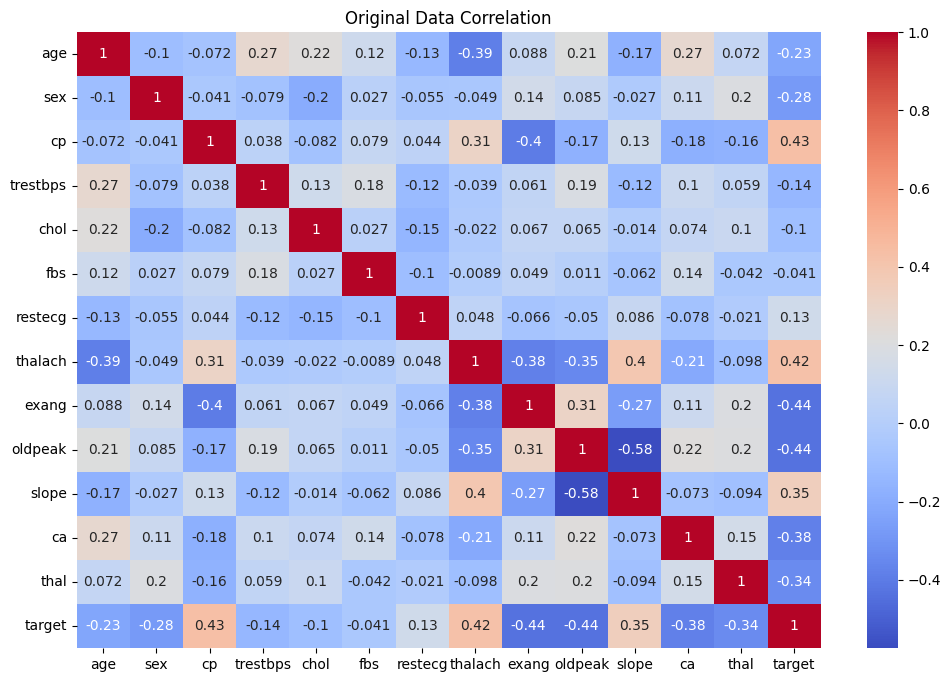

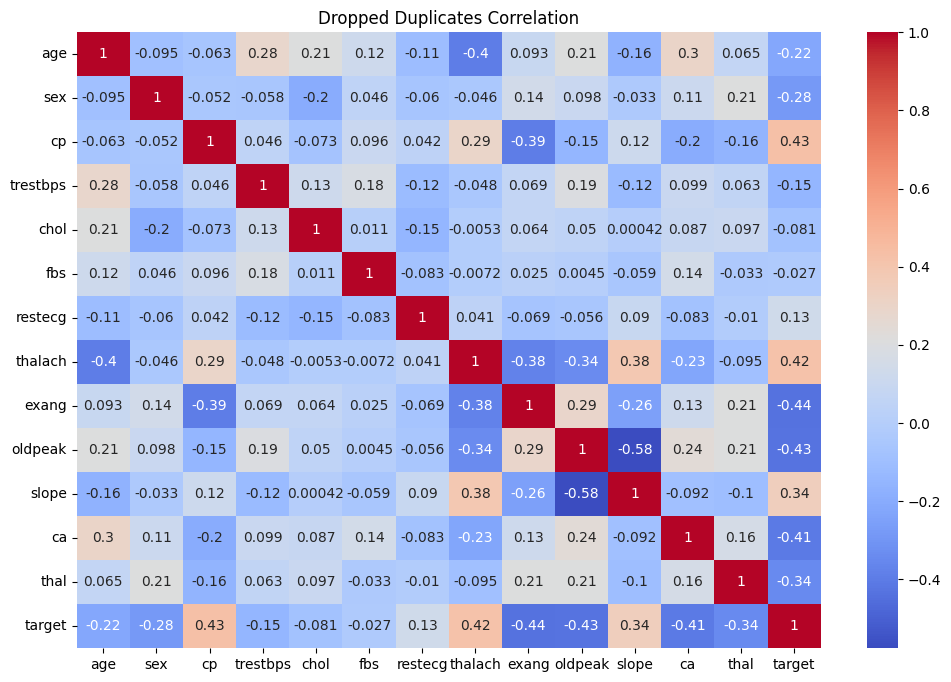

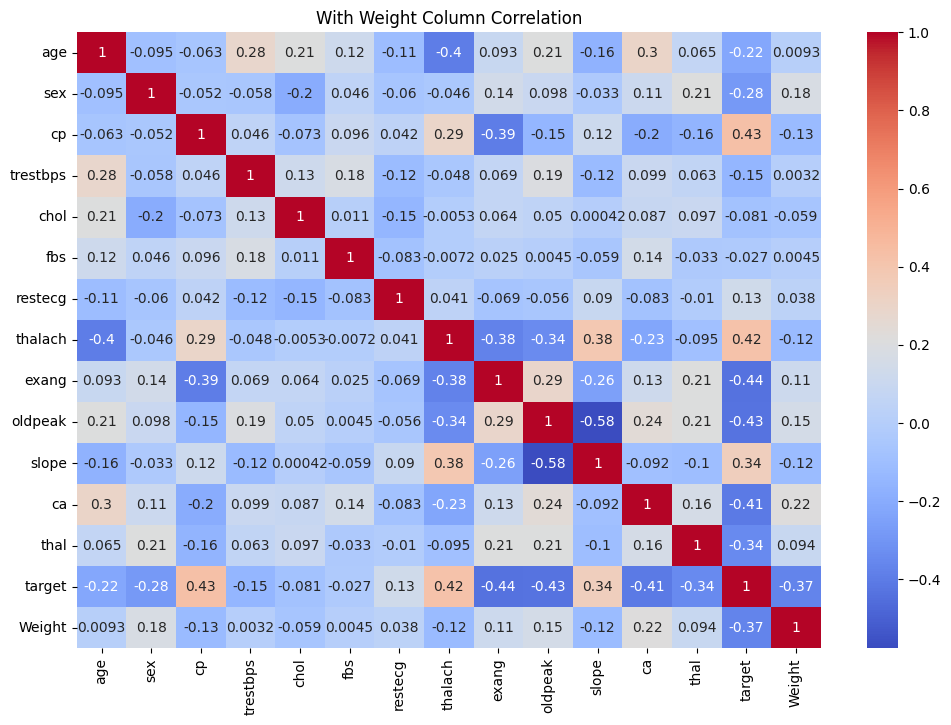

In [12]:
# 1. Original Data (Normal)
corr_normal = df.corr()

# 2. Data with Duplicates Dropped
data_without_duplicates = df.drop_duplicates()
corr_dropped_duplicates = data_without_duplicates.corr()

# 3. Data with Weight Column (Adding the Weight Column if not already added)


# Calculate correlation with weight column
corr_with_weight = dropped_df.corr()


# Plot the original correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_normal, annot=True, cmap="coolwarm")
plt.title("Original Data Correlation")
plt.show()

# Plot the correlation matrix after dropping duplicates
plt.figure(figsize=(12,8))
sns.heatmap(corr_dropped_duplicates, annot=True, cmap="coolwarm")
plt.title("Dropped Duplicates Correlation")
plt.show()

# Plot the correlation matrix with weight column
plt.figure(figsize=(12,8))
sns.heatmap(corr_with_weight, annot=True, cmap="coolwarm")
plt.title("With Weight Column Correlation")
plt.show()


### Conclusion

From the analysis, the correlation matrices for both the **original data** and the **data with the weight column** are almost identical. This suggests that adding a weight column based on the frequency of occurrences does not significantly alter the relationships between the variables. The correlation coefficients remain very similar in both cases, indicating that the inclusion of the weight did not have a strong impact on the linear relationships between the variables.

In summary, the frequency-based weighting did not notably affect the correlation structure in this dataset.


# Exploratory Data Analysis¶


Univariate Analysis

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
print(min(df["chol"].unique()) , max(df["chol"].unique()))
df['age'].nunique()

126 564


41

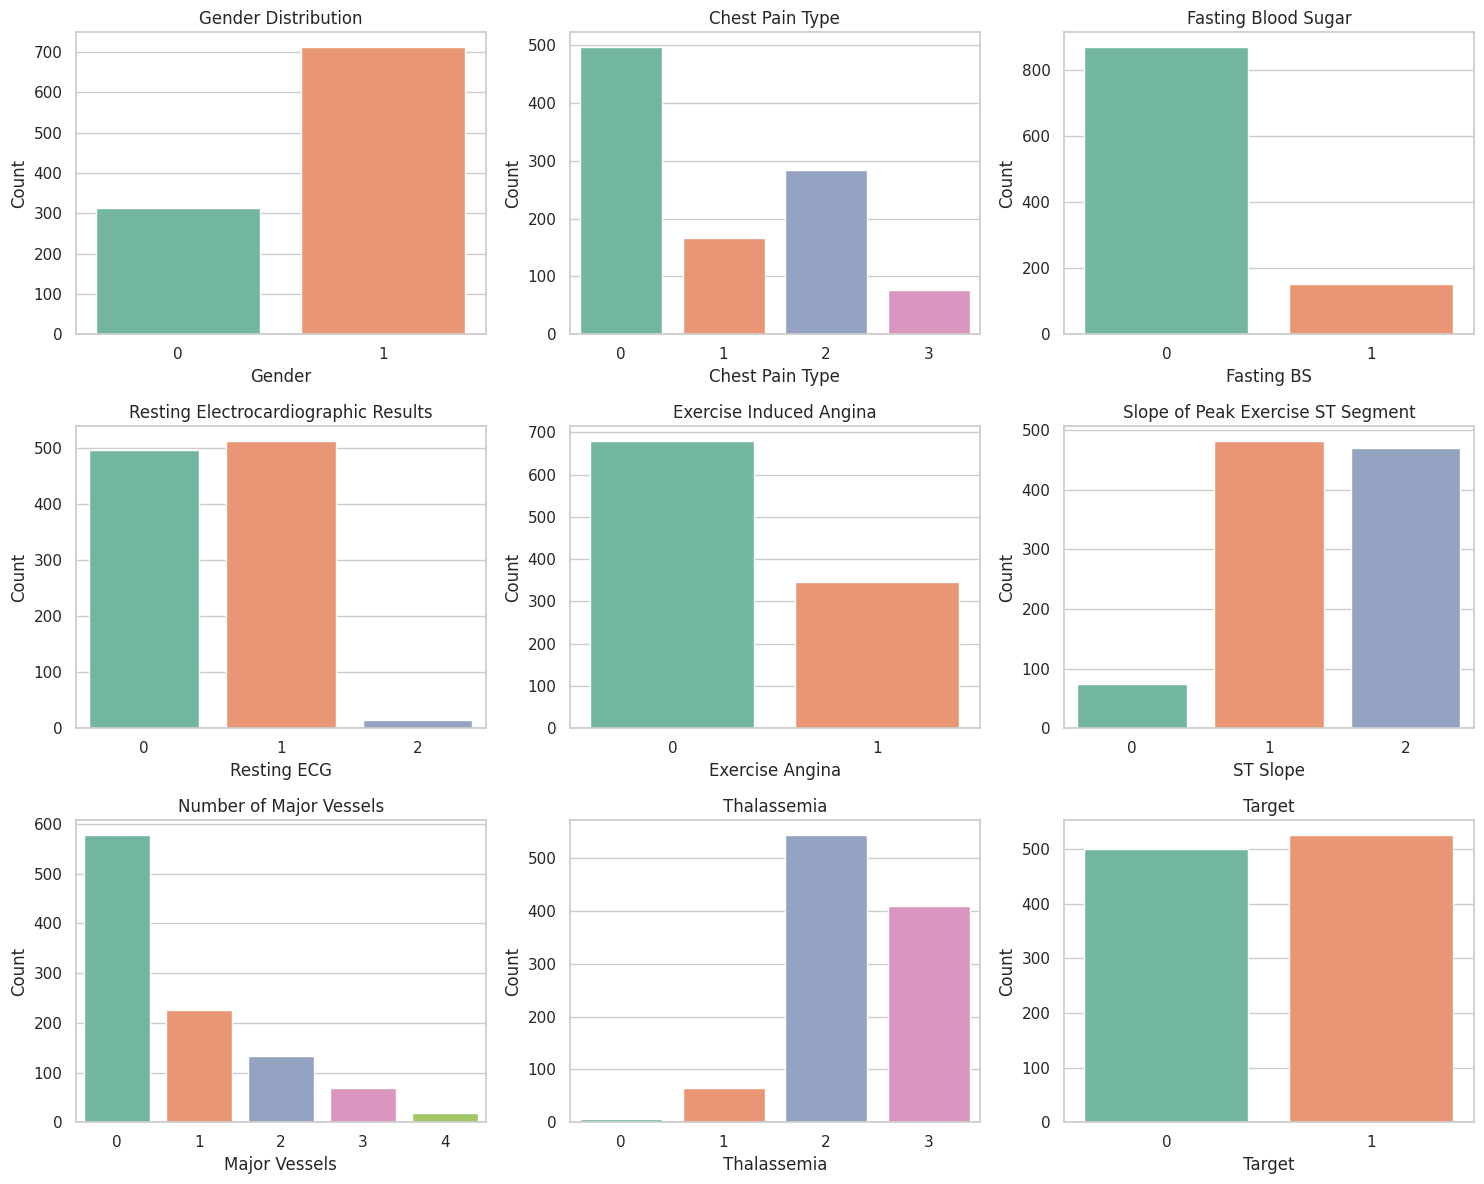

In [15]:

# Set the style for the plots
sns.set(style="whitegrid")

# Set the figure size (15x12 inches)
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) 

# Function to create count plots
def count_plot(column, data_frame, cor, title, label):
    sns.countplot(x=column, data=data_frame, palette='Set2', ax=axes[cor[0], cor[1]])
    axes[cor[0], cor[1]].set_title(title)
    axes[cor[0], cor[1]].set_xlabel(label)
    axes[cor[0], cor[1]].set_ylabel('Count')

# List of columns and corresponding titles and labels
columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal" , "target"]
titles = ["Gender Distribution", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results",
          "Exercise Induced Angina", "Slope of Peak Exercise ST Segment", "Number of Major Vessels",
          "Thalassemia" , 'Target']
labels = ["Gender", "Chest Pain Type", "Fasting BS", "Resting ECG", "Exercise Angina", "ST Slope", "Major Vessels", "Thalassemia" , "Target"]

# Loop through the columns, titles, and labels, and plot
for i, column in enumerate(columns):
    count_plot(column, df, (i//3, i%3), titles[i], labels[i])

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plot
plt.show()


# Skewness and Kurtosis Analysis for Numeric Columns

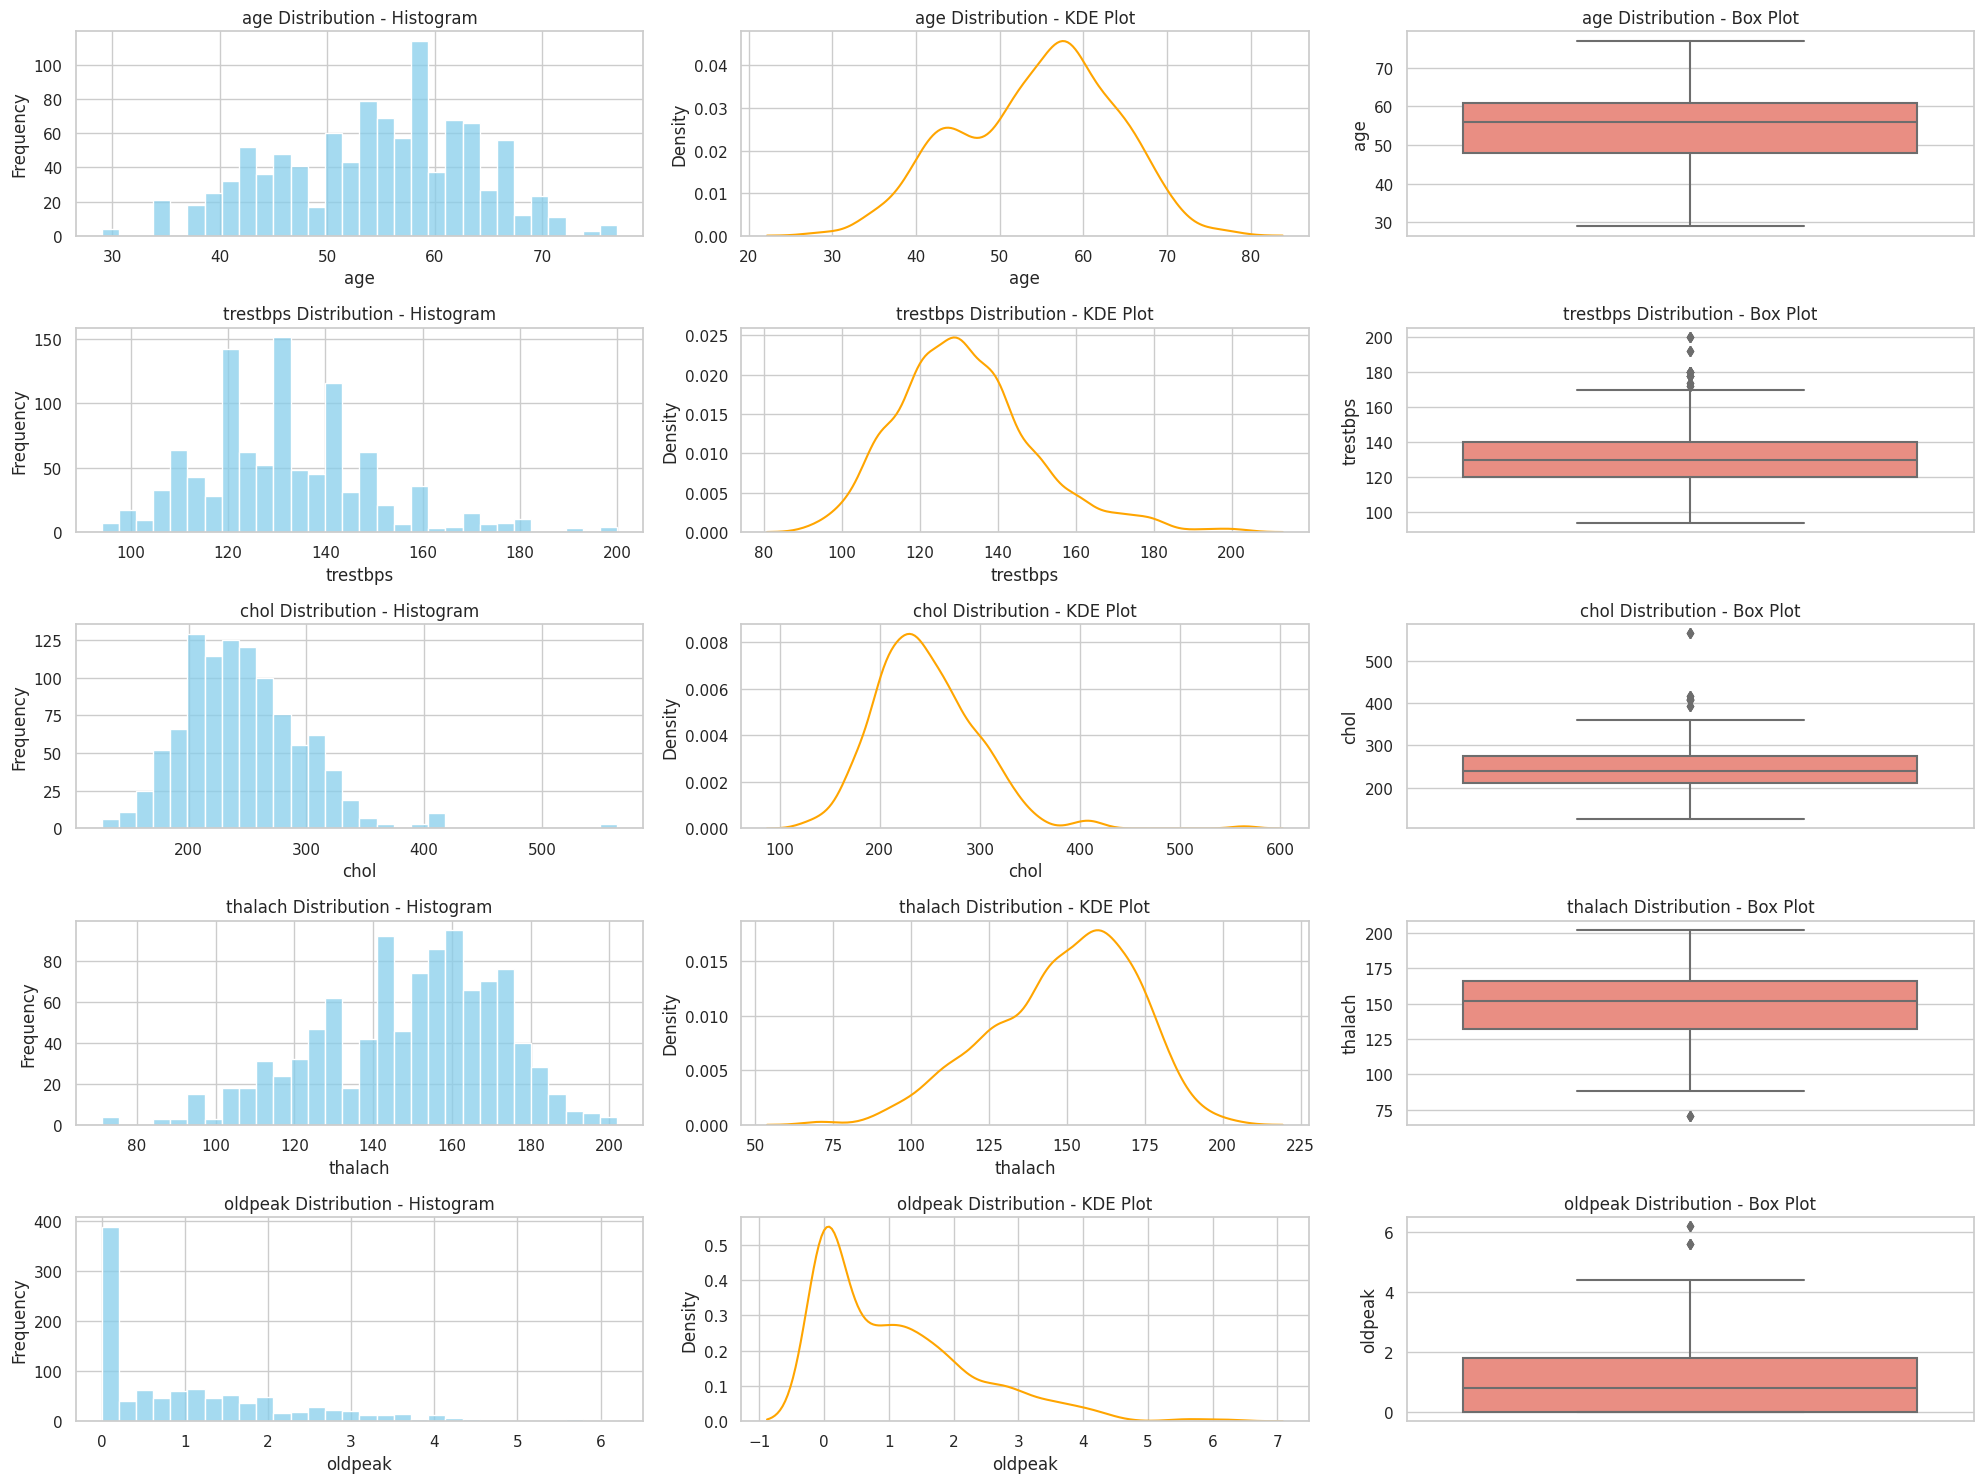

In [16]:
# Set the style for the plots
sns.set(style="whitegrid")

# List of numeric columns for which you want to create plots (excluding 'age' and 'sex')
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Set the figure size
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# Function to create histograms, KDE, and box plots for each column
def plot_distribution(column, data_frame, cor, title, label):
    # Plot Histogram
    sns.histplot(data_frame[column], kde=False, ax=axes[cor[0], 0], color='skyblue', bins=30)
    axes[cor[0], 0].set_title(f'{title} - Histogram')
    axes[cor[0], 0].set_xlabel(label)
    axes[cor[0], 0].set_ylabel('Frequency')
    
    # Plot KDE Plot
    sns.kdeplot(data=data_frame[column], ax=axes[cor[0], 1], color='orange')
    axes[cor[0], 1].set_title(f'{title} - KDE Plot')

    # Plot Boxplot
    sns.boxplot(y=data_frame[column], ax=axes[cor[0], 2], color='salmon')
    axes[cor[0], 2].set_title(f'{title} - Box Plot')

# Loop through the numeric columns and plot the distributions
for i, column in enumerate(numeric_columns):
    plot_distribution(column, df, (i, 0), f'{column} Distribution', column)

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# List of numeric columns to calculate skewness and kurtosis
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Create a dictionary to store skewness and kurtosis values
skew_kurt_data = {}

# Loop through the numeric columns and calculate skewness and kurtosis
for column in numeric_columns:
    skew_kurt_data[column] = {
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurt()
    }

# Convert the dictionary to a DataFrame
skew_kurt_df = pd.DataFrame(skew_kurt_data).T

# Display the DataFrame
(skew_kurt_df)


,Skewness,Kurtosis
age,-0.248866,-0.525618
trestbps,0.739768,0.991221
chol,1.074073,3.996803
thalach,-0.513777,-0.088822
oldpeak,1.210899,1.314471


### Data Exploration

- **Age**: 
  The distribution is roughly normal, with the majority of individuals aged between 40 and 60 years.

- **Sex**: 
  The dataset contains more males (M) than females (F).

- **Chest Pain Type (ChestPainType)**: 
  Among the categories (ATA, NAP, ASY, TA), the "ASY" category appears most common, indicating many individuals may experience atypical symptoms.

- **Resting Blood Pressure (RestingBP)**: 
  The values center around 120 mmHg, with a slight skew toward higher readings.

- **Cholesterol (Chol)**: 
  The data follows a near-normal distribution, with most values between 150 and 300 mg/dL, suggesting varying cholesterol levels across the population.

- **Fasting Blood Sugar (FastingBS)**: 
  Most people in the dataset have a fasting blood sugar below 1, indicating fasting blood sugar is generally within the normal range.

- **Resting ECG (RestingECG)**: 
  The majority fall into the "Normal" category, with fewer cases in "ST" or "LVH" categories.

- **Max Heart Rate Achieved (MaxHR)**: 
  The distribution peaks around 140-160 beats per minute, indicating typical heart rate limits during exertion.

- **Exercise-Induced Angina (ExerciseAngina)**: 
  Most individuals do not experience exercise-induced angina, as indicated by the dominance of the "N" category.

- **Oldpeak (ST Depression)**: 
  Most values are close to zero, suggesting relatively normal exercise ECG results for many participants.

- **ST Slope (ST Slope)**: 
  "Flat" is the most common slope type, followed by "Up," indicating variability in ECG patterns.

- **Heart Disease (target)**: 
  The target variable shows a bimodal distribution, indicating both the presence and absence of heart disease cases.

---

### Conclusion: Skewness and Kurtosis Analysis

- **Age**: 
  - Skewness: -0.25 (slight negative skewness, distribution slightly right-skewed).
  - Kurtosis: -0.53 (platykurtic distribution, fewer extreme values than a normal distribution).

- **Resting Blood Pressure (Trestbps)**: 
  - Skewness: 0.74 (positive skewness, left-skewed distribution).
  - Kurtosis: 0.99 (distribution close to normal with moderate tails).

- **Cholesterol (Chol)**: 
  - Skewness: 1.07 (positive skewness, left-skewed distribution).
  - Kurtosis: 3.99 (leptokurtic distribution, more extreme values than a normal distribution).

- **Max Heart Rate Achieved (Thalach)**: 
  - Skewness: -0.51 (slight negative skewness, right-skewed distribution).
  - Kurtosis: -0.09 (platykurtic distribution, fewer extreme values than a normal distribution).

- **Oldpeak (ST Depression)**: 
  - Skewness: 1.21 (positive skewness, left-skewed distribution).
  - Kurtosis: 1.31 (platykurtic distribution, fewer extreme values than a normal distribution).


**Bivariate Analysis**

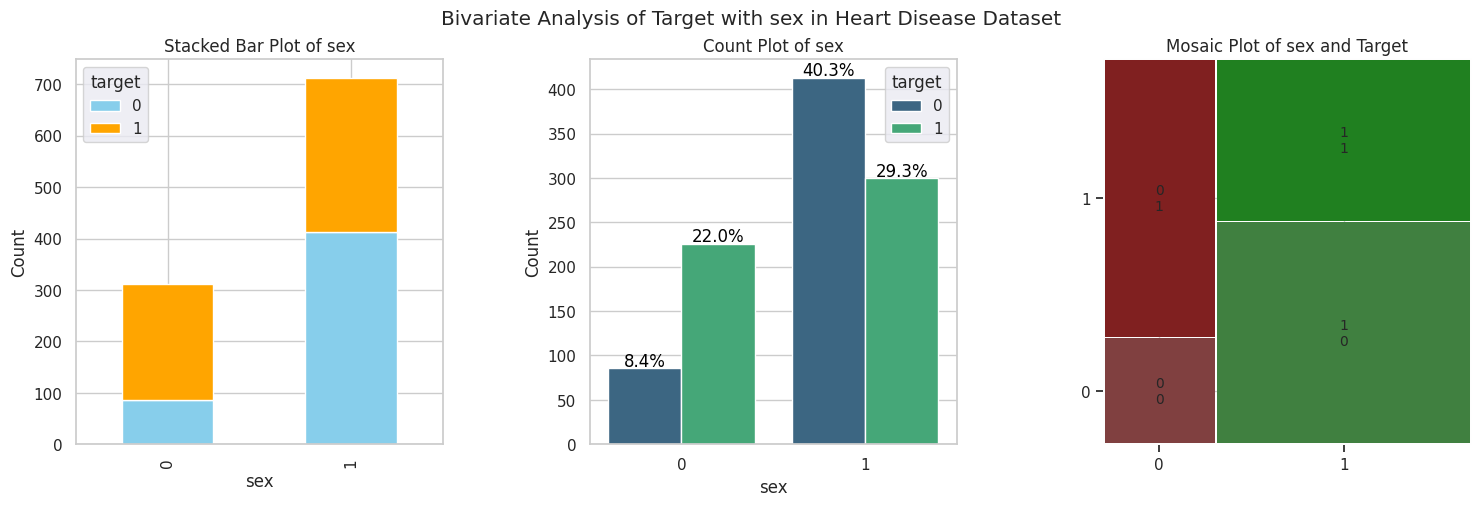

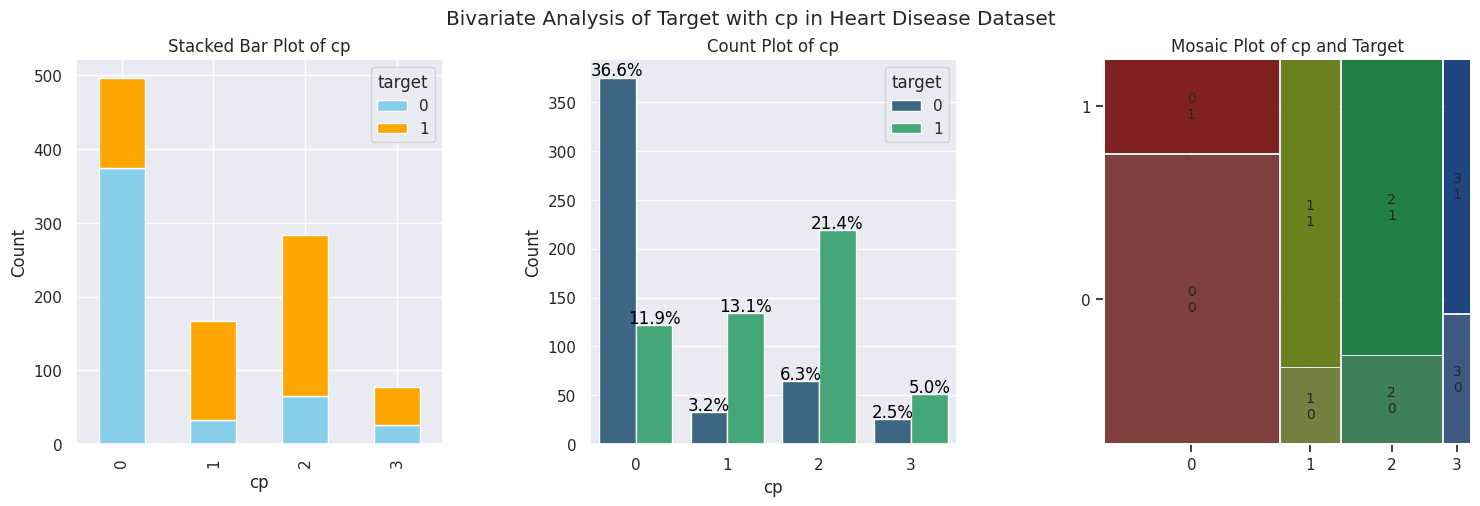

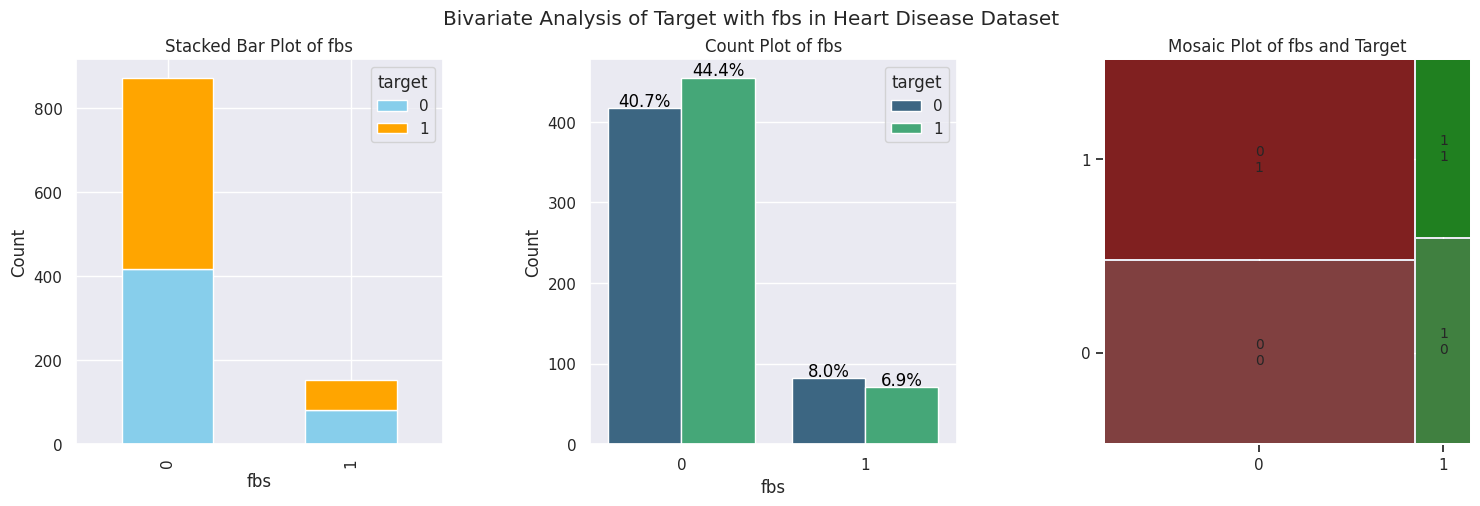

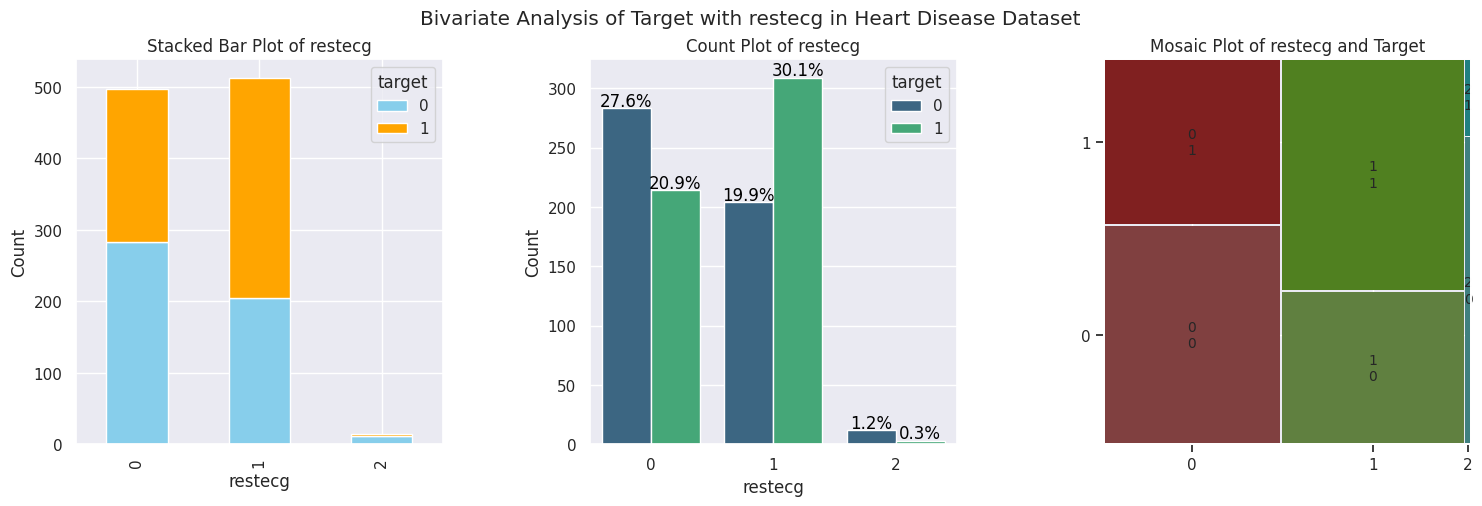

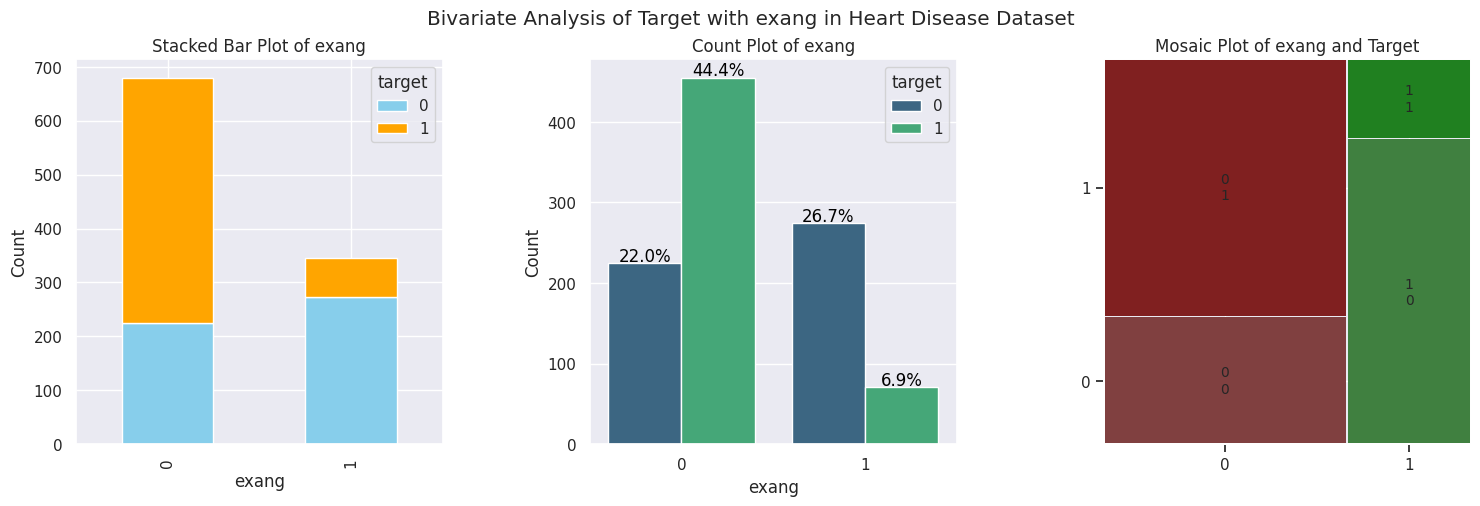

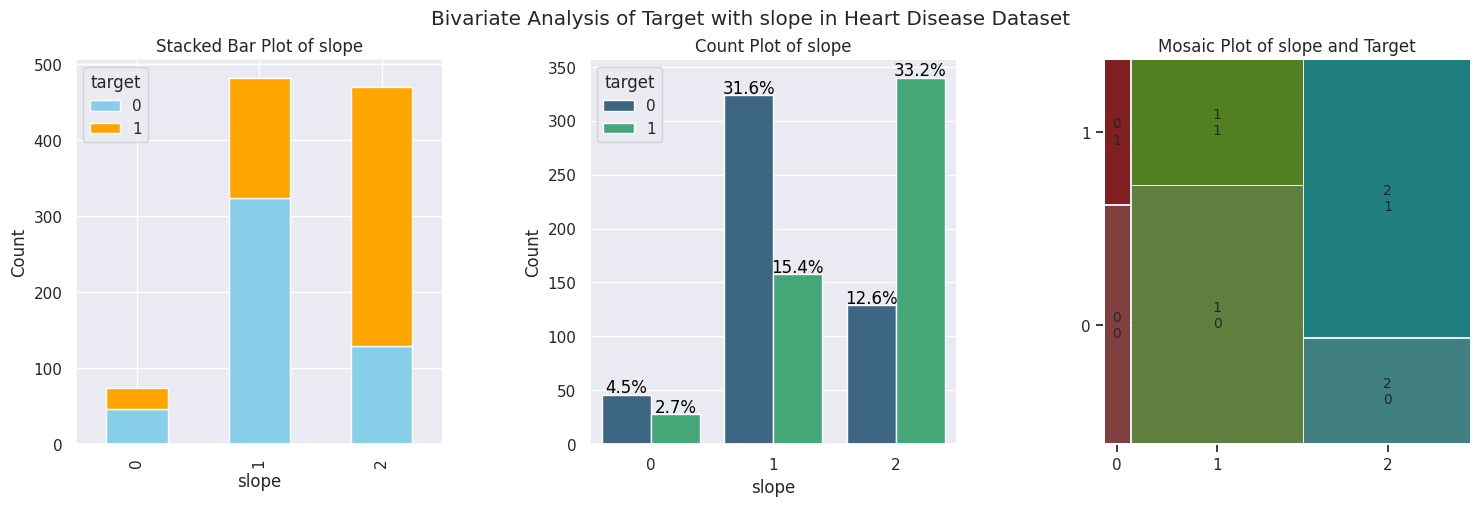

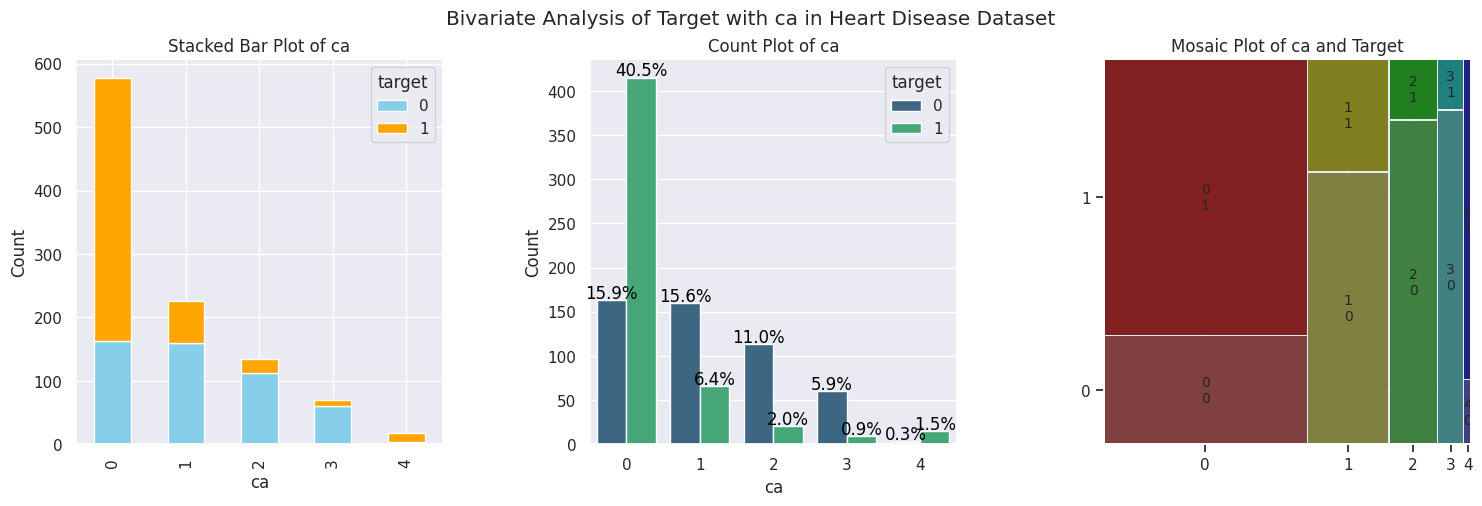

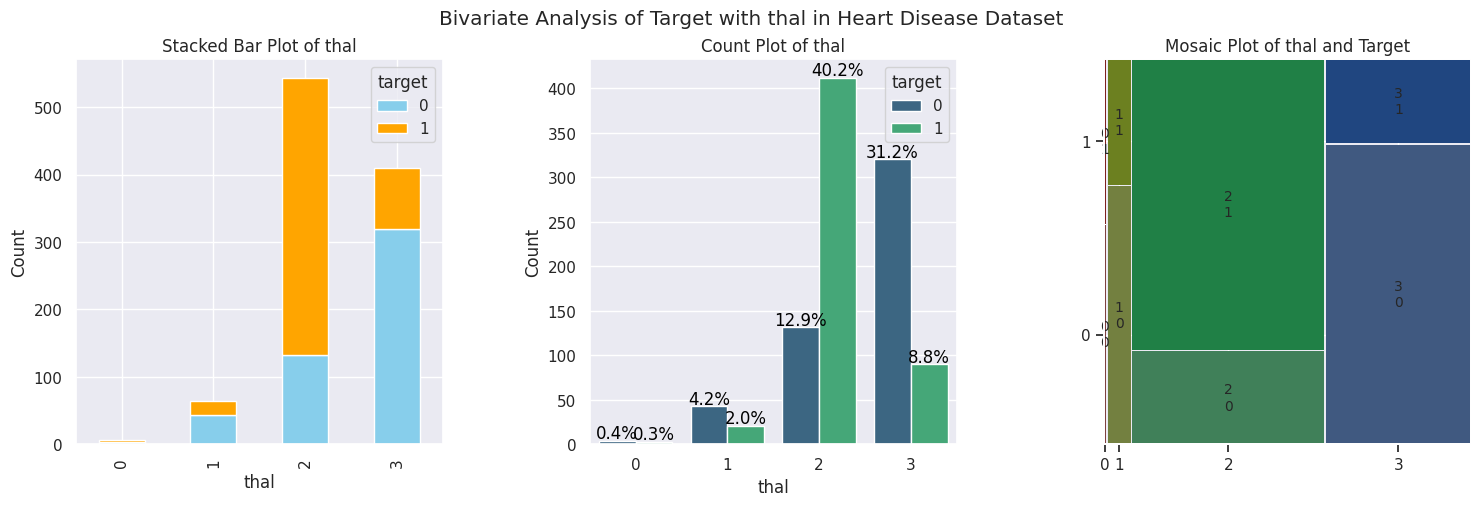

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_categorical_bivariate_analysis(feature):
    # Set up subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Bivariate Analysis of Target with {feature} in Heart Disease Dataset')
    plt.subplots_adjust(wspace=0.4)
    sns.set_style('darkgrid')

    # Stacked Bar Plot with Percentage
    crosstab = pd.crosstab(df[feature], df['target'])
    crosstab_pct = crosstab.div(crosstab.sum(1), axis=0) * 100  # Calculate percentage
    crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'orange'])
    axes[0].set_title(f'Stacked Bar Plot of {feature}')
    axes[0].set_xlabel(f'{feature}')
    axes[0].set_ylabel('Count')

    # Count Plot with Percentage
    sns.countplot(data=df, x=feature, hue='target', ax=axes[1], palette='viridis')

    # Calculate percentage for annotation
    total = len(df)
    for p in axes[1].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', color='black', xytext=(0, 5),
                         textcoords='offset points')

    axes[1].set_title(f'Count Plot of {feature}')
    axes[1].set_xlabel(f'{feature}')
    axes[1].set_ylabel('Count')

    # Mosaic Plot
    mosaic_data = pd.crosstab(df[feature], df['target']).stack()
    mosaic(mosaic_data, ax=axes[2], title=f'Mosaic Plot of {feature} vs Target')
    axes[2].set_title(f'Mosaic Plot of {feature} and Target')

    plt.show()

# Example Usage:
columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
for col in columns:
    plot_categorical_bivariate_analysis(col)
    plt.savefig(f'bivariate_analysis_{col}.png')
    plt.close()  # Close the figure to avoid overlap in subsequent plots


## Conclusion from Bivariate Analysis of Heart Disease Dataset

### 1. **Sex (Gender) Distribution:**
   - **Male (sex = 1)**: About **72.44%** of men in the dataset have heart disease (target = 1), while **27.56%** do not.
   - **Female (sex = 0)**: For females, **57.92%** have heart disease, and **42.08%** do not. This indicates a higher percentage of males having heart disease compared to females.

### 2. **Chest Pain Type (cp):**
   - **cp = 1 (typical angina)**: This group has a significantly higher likelihood of heart disease, with **75.45%** of individuals diagnosed with heart disease.
   - **Other chest pain types**: Categories like **cp = 0 (non-anginal pain)** and **cp = 2 or 3** show a varied distribution, with **80.24%** of people with **cp = 1** having heart disease.

### 3. **Fasting Blood Sugar (fbs):**
   - **fbs = 1 (fasting blood sugar > 120 mg/dl)**: Those with high fasting blood sugar show a higher likelihood of heart disease, with **53.59%** having the disease.
   - **fbs = 0 (normal fasting blood sugar)**: This group has a lower incidence of heart disease, suggesting elevated fasting blood sugar levels may be associated with higher risk.

### 4. **Resting Electrocardiographic Results (restecg):**
   - **restecg = 0** (normal resting electrocardiogram): Approximately **56.94%** of individuals with a normal resting electrocardiogram have heart disease.
   - **Other categories**: Variations in heart disease prevalence across different **restecg** categories show how important resting ECG results might be in diagnosing heart disease.

### 5. **Exercise Induced Angina (exang):**
   - **exang = 0 (no exercise induced angina)**: **62.16%** of individuals in this group have heart disease.
   - **exang = 1 (exercise induced angina)**: This category shows a higher percentage of heart disease (**67.22%**), suggesting that exercise-induced angina may be a significant risk factor.

### 6. **Slope of Peak Exercise ST Segment (slope):**
   - **slope = 0 (downsloping)**: Individuals in this category have a higher likelihood of heart disease, with **62.16%** diagnosed with heart disease.
   - **slope = 1 (upsloping)**: This group shows a lower percentage of heart disease (**37.84%**), indicating that the slope of the ST segment may be correlated with heart disease risk.

### 7. **Number of Major Vessels Colored by Fluoroscopy (ca):**
   - **ca = 1 (1 vessel colored)**: People in this group have a significantly higher incidence of heart disease, with **71.80%** of them diagnosed.
   - **ca = 0 (no vessels colored)**: Only **28.20%** of individuals in this group have heart disease, showing that the number of affected vessels is a strong indicator of heart disease.

### 8. **Thalassemia (thal):**
   - **thal = 2 (normal thalassemia)**: Individuals in this category have a relatively high proportion of heart disease cases (**75.74%**).
   - **thal = 3 (fixed defect)**: Similar trends are seen with **thal = 3**, indicating that thalassemia defects may be associated with increased heart disease risk.

---

### Key Insights:
- **Higher Risk Factors**: The following features are associated with a higher likelihood of heart disease:
  - **Chest Pain Type (cp = 1)**, **Exercise Induced Angina (exang = 1)**, **Downsloping ST Segment (slope = 0)**, **Increased Number of Affected Vessels (ca = 1)**, and **Abnormal Thalassemia (thal = 2 or 3)**.
  
- **Lower Risk Factors**: Categories such as **Non-anginal Chest Pain (cp = 0)**, **Normal Resting ECG (restecg = 0)**, and **Absence of Exercise-Induced Angina (exang = 0)** are associated with a lower likelihood of heart disease.



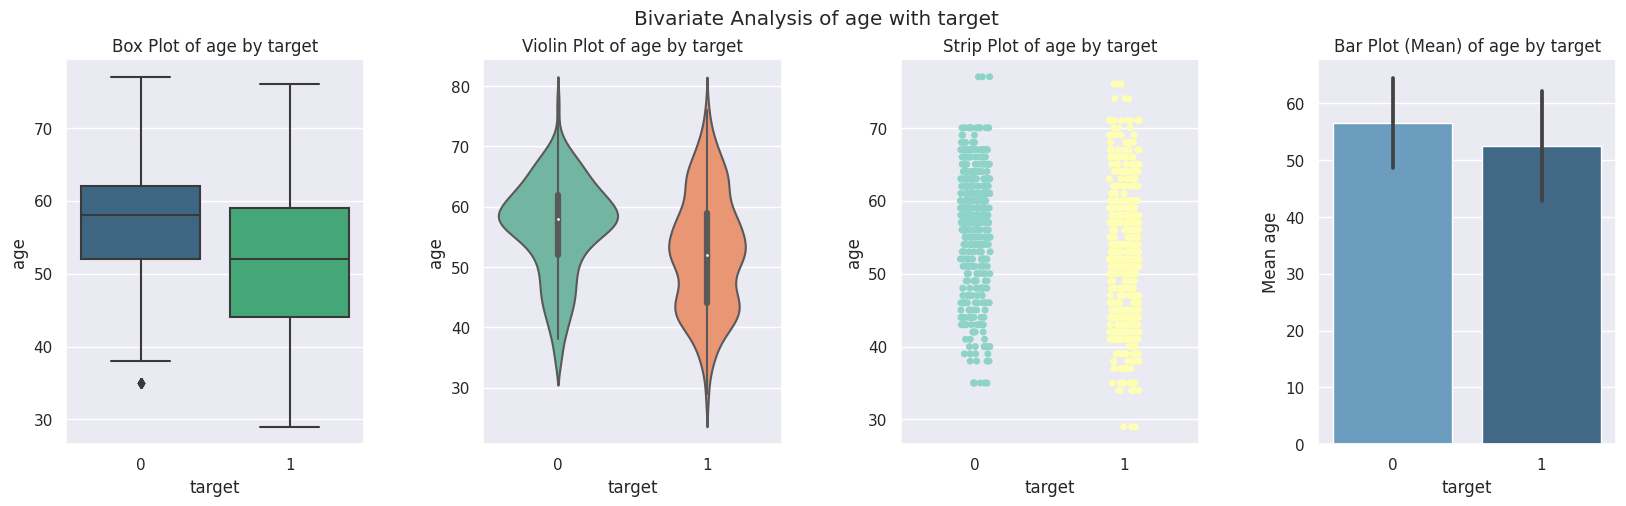

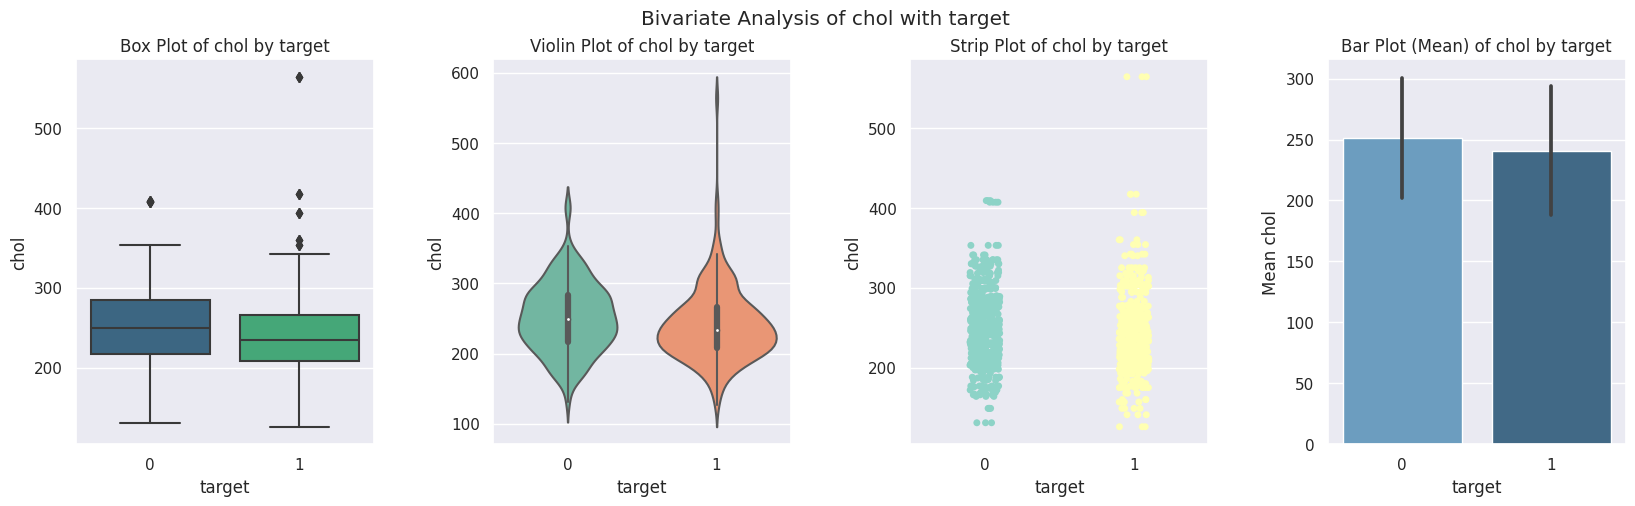

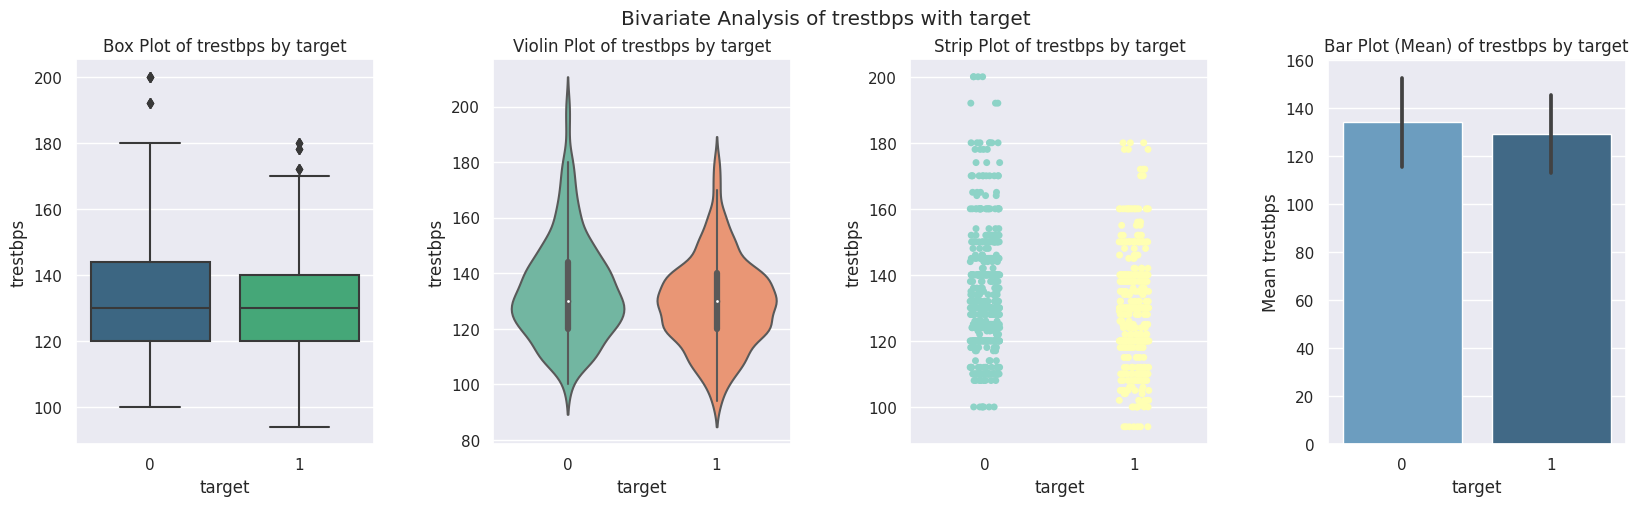

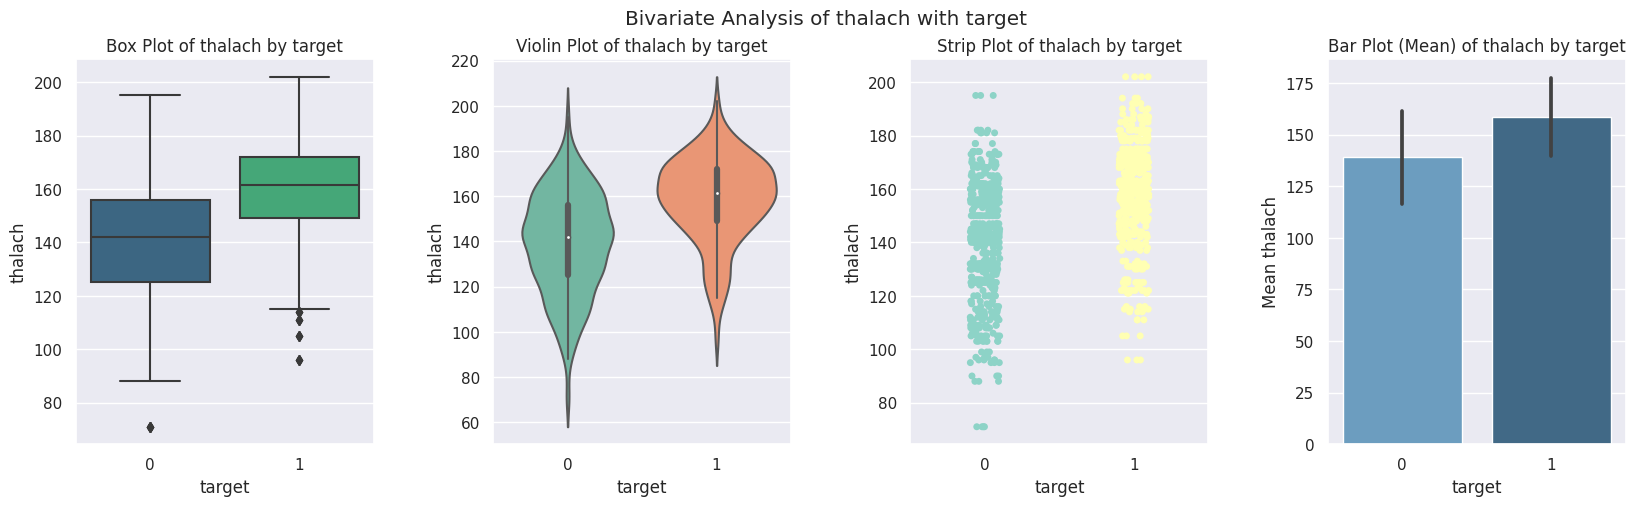

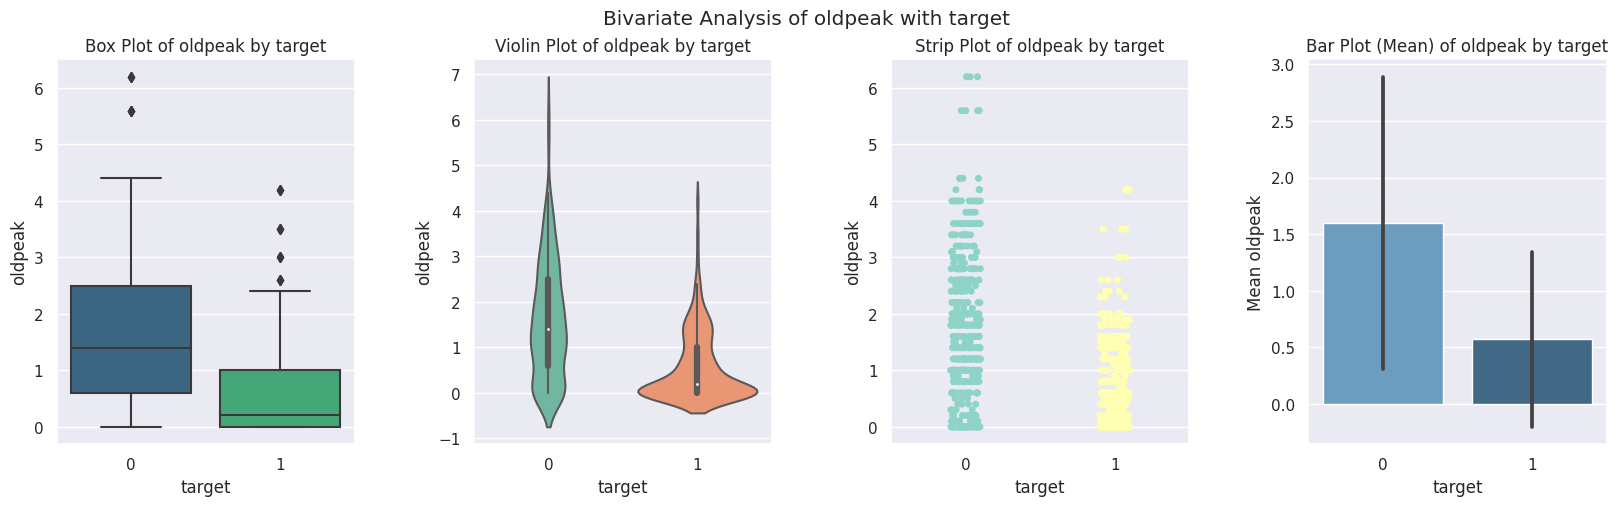

In [19]:
def plot_numerical_categorical_analysis(numerical_feature, categorical_feature):
    # Set up subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'Bivariate Analysis of {numerical_feature} with {categorical_feature}')
    plt.subplots_adjust(wspace=0.4)
    sns.set_style('darkgrid')

    # Box Plot
    sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
    axes[0].set_title(f'Box Plot of {numerical_feature} by {categorical_feature}')
    axes[0].set_xlabel(categorical_feature)
    axes[0].set_ylabel(numerical_feature)

    # Violin Plot
    sns.violinplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], palette='Set2')
    axes[1].set_title(f'Violin Plot of {numerical_feature} by {categorical_feature}')
    axes[1].set_xlabel(categorical_feature)
    axes[1].set_ylabel(numerical_feature)

    # Strip Plot
    sns.stripplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[2], jitter=True, palette='Set3')
    axes[2].set_title(f'Strip Plot of {numerical_feature} by {categorical_feature}')
    axes[2].set_xlabel(categorical_feature)
    axes[2].set_ylabel(numerical_feature)

    # Bar Plot (with mean aggregation)
    sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[3], estimator=np.mean, ci='sd', palette='Blues_d')
    axes[3].set_title(f'Bar Plot (Mean) of {numerical_feature} by {categorical_feature}')
    axes[3].set_xlabel(categorical_feature)
    axes[3].set_ylabel(f'Mean {numerical_feature}')

    plt.show()

# Example Usage:
plot_numerical_categorical_analysis('age', 'target')
plot_numerical_categorical_analysis('chol', 'target')
plot_numerical_categorical_analysis('trestbps', 'target')
plot_numerical_categorical_analysis('thalach', 'target')
plot_numerical_categorical_analysis('oldpeak', 'target')


In [20]:
# Conclusion

# Data Modelling

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

copy_df = df.copy(deep=True)

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
numerical_data = ["age", "trestbps", "chol", "thalach", "oldpeak"]
# Loop through the numerical columns
for i in numerical_data:
    # Apply Min-Max Scaler first
    min_max_scaled_data = min_max_scaler.fit_transform(copy_df[[i]])
    
    # Then apply Standard Scaler
    standard_scaled_data = standard_scaler.fit_transform(min_max_scaled_data)
    
    # Flatten the array and assign it back to the dataframe
    copy_df[i] = standard_scaled_data.flatten()

copy_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal" , ]

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False)

# Transform the categorical columns and create a DataFrame
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), 
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original numerical columns with the encoded categorical columns
final_df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

(final_df)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53,140,203,155,3.1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70,145,174,125,2.6,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61,148,203,161,0.0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,138,294,106,1.9,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1021,60,125,258,141,2.8,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1022,47,110,275,118,1.0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1023,50,110,254,159,0.0,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

In [25]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [26]:
results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time()  # Start the timer
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  # End the timer
    
    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time  # Time taken to run the model
        # Store the results in the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc,
        "Time (s)": elapsed_time
    })

    print(f"{name} completed in {elapsed_time:.4f} seconds.")


Logistic Regression completed in 0.1784 seconds.
Random Forest completed in 1.0422 seconds.
SVM completed in 0.4976 seconds.
Decision Tree completed in 0.0759 seconds.
KNN completed in 0.1755 seconds.
Naive Bayes completed in 0.0706 seconds.
Gradient Boosting completed in 0.8390 seconds.
AdaBoost completed in 0.6098 seconds.
Bagging Classifier completed in 0.2373 seconds.
MLP Classifier completed in 2.5847 seconds.



# Display Detailed Performance Results

In [27]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

In [28]:
# Sort by Accuracy (or any other metric of choice)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [29]:
# Display the model performance results
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
1,Random Forest,0.970697,0.966291,0.978772,0.972410,0.995792,1.042208
3,Decision Tree,0.963714,0.962068,0.970737,0.965927,0.963310,0.075929
8,Bagging Classifier,0.951195,0.957636,0.949544,0.953396,0.986790,0.237326
6,Gradient Boosting,0.948427,0.937914,0.968105,0.952285,0.981745,0.838981
7,AdaBoost,0.898125,0.896647,0.912281,0.904166,0.956009,0.609845
9,MLP Classifier,0.875864,0.864379,0.907298,0.884652,0.946057,2.584656
0,Logistic Regression,0.875864,0.873252,0.893930,0.883419,0.936842,0.178378
5,Naive Bayes,0.820066,0.788132,0.899158,0.839707,0.895635,0.070552
4,KNN,0.715491,0.742234,0.705579,0.723042,0.816901,0.175501
2,SVM,0.688957,0.674966,0.787825,0.726728,0.763498,0.497592


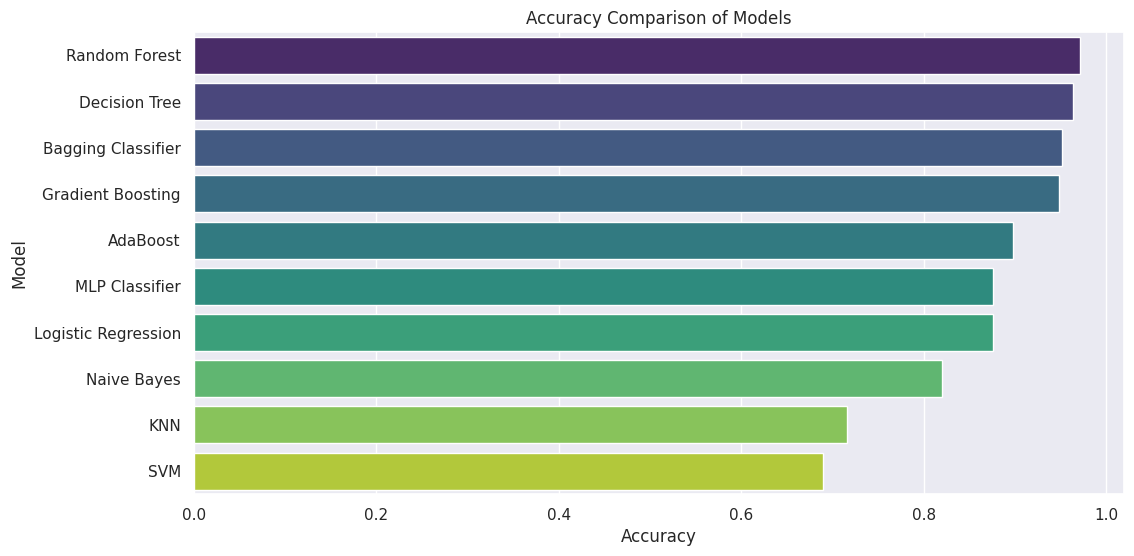

In [30]:
# Plot the model accuracy results
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()



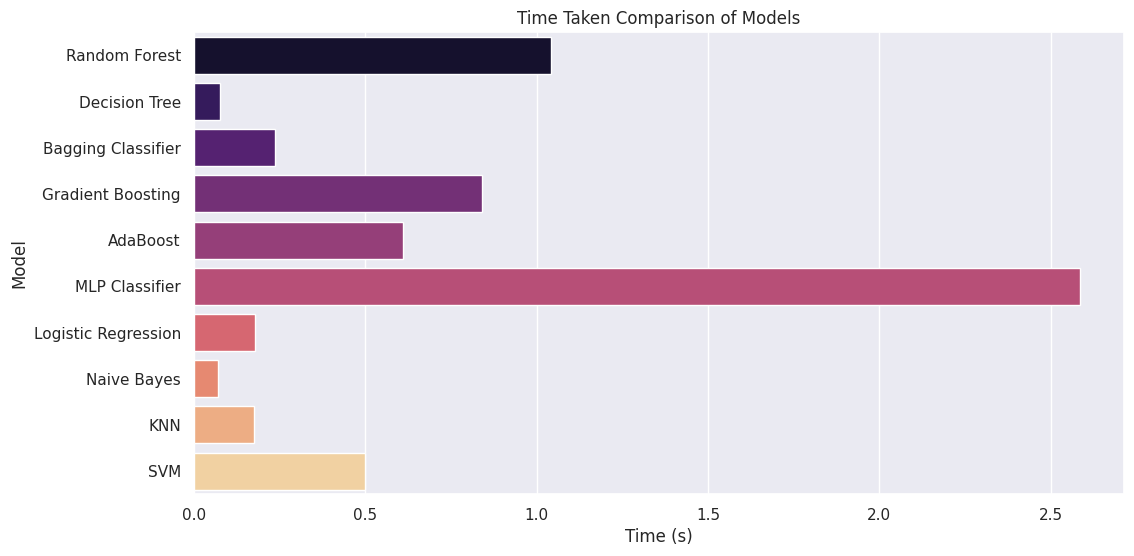

In [31]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

In [32]:
# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))



Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9749


In [34]:
# Evaluating on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf:.4f}")

Random Forest Test Accuracy after tuning: 0.9805


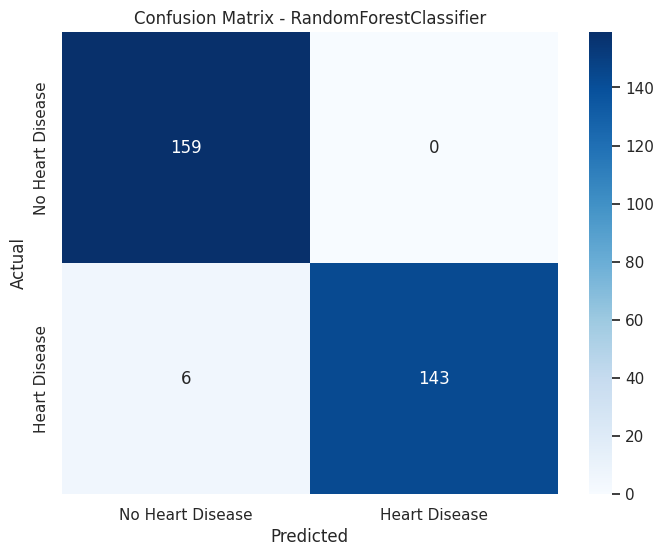

In [35]:
# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

